# 쓰레기 감지 최종 프로젝트
## EDA

**데이터셋 : AI HUB 생활폐기물 데이터 활용·환류**

[AI HUB링크](https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=71385)

Train Data EDA

# 이미지당 객체 개수

In [28]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [29]:
import os
import json

def get_folder_names(path):
    folder_names = []
    for item in os.listdir(path):
        if os.path.isdir(os.path.join(path, item)):
            folder_names.append(item)
    return folder_names

# 폴더 이름을 가져올 경로를 지정.
root_path = r'C:\Users\minki\Desktop\B5_최종프로젝트\01.데이터\Training\02.라벨링데이터'

# 폴더 이름을 가져와서 출력합니다.
folders = get_folder_names(root_path)
print(f'폴더 개수 : {len(folders)}')

폴더 개수 : 20


In [ ]:
object_count = [0 for i in range(50)]

count_file = 0

for i , folder_name in tqdm(enumerate(folders)):
    folder_path = os.path.join(root_path, folders[i])
    for file_name in os.listdir(folder_path):
        with open(os.path.join(folder_path, file_name), 'r') as f:
            data = json.load(f)
            object_count[len(data['objects'])] += 1

In [ ]:
max_count = 0
for i in range(999,-1,-1):
    if object_count[i]!=0:
        max_count = i
        print(f'최대 개수는 : {max_count}')
        break

최대 개수는 : 44


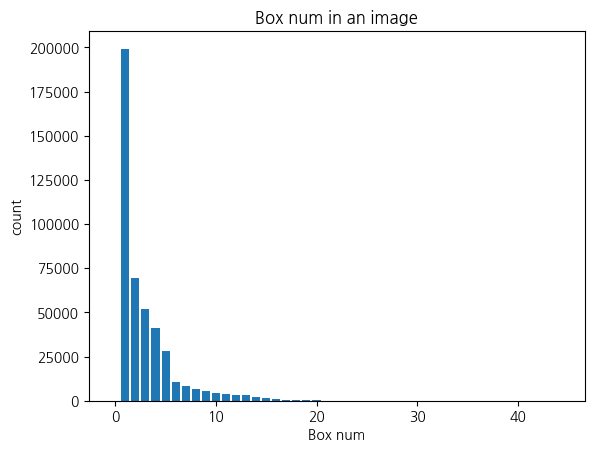

In [ ]:
x = np.arange(max_count+1)
y = np.array(object_count[:max_count+1])
plt.title("Box num in an image")
plt.bar(x, y)
plt.xlabel("Box num")
plt.ylabel("count")
plt.show()

In [ ]:
np.save('BoxNum_in_images.npy', y)
#y = np.load('BoxNum_in_images.npy')

In [27]:
y

array([     0, 199231,  69251,  51786,  41229,  28313,  10387,   8235,
         6392,   5344,   4461,   3874,   3431,   2956,   2197,   1567,
          823,    560,    350,    223,    203,    109,     93,     51,
           52,     26,     30,     15,     12,      6,     11,      7,
            7,      5,      0,      1,      2,      0,      0,      0,
            0,      0,      0,      0,      1])

In [8]:
# Class name

label_to_classname = {
    'c_1': '종이',
    'c_2_01': '종이팩',
    'c_2_02': '종이컵',
    'c_3': '캔류',
    'c_4_01_02': '재사용 유리 (소주병+맥주병)',
    'c_4_02_01_02': '갈색 유리',
    'c_4_02_02_02': '녹색 유리',
    'c_4_02_03_02': '백색 유리',
    'c_4_03': '기타 유리',
    'c_5_02': '페트',
    'c_6': '플라스틱',
    'c_7': '비닐',
    'c_1_01': '종이 + 이물질',
    'c_2_02_01': '종이컵 + 이물질',
    'c_3_01': '캔 + 이물질',
    'c_4_03_01': '기타유리 + 이물질',
    'c_5_01_01': '페트 + 이물질 + 다중포장재',
    'c_5_02_01': '페트 + 이물질',
    'c_6_01': '플라스틱 + 이물질',
    'c_7_01': '비닐 + 이물질',
    'c_4_01_01': '재사용 유리 (소주병+맥주병) + 다중포장재',
    'c_4_02_01_01': '갈색 유리 + 다중포장재',
    'c_4_02_02_01': '녹색 유리 + 다중포장재',
    'c_4_02_03_01': '백색 유리 + 다중포장재',
    'c_5_01': '페트 + 다중포장재',
    'c_8_01': '흰색 스티로폼',
    'c_8_02': '컬러 스티로폼',
    'c_8_01_01': '스티로폼 + 이물질',
    'c_9': '건전지'
}